# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

print(dog_files[0])

There are 13233 total human images.
There are 8351 total dog images.
/data/dog_images/train/103.Mastiff/Mastiff_06833.jpg


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


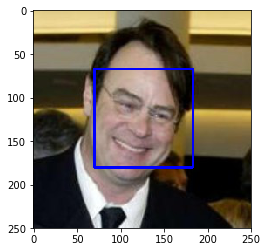

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__  
98% of human images had face detections  
17% of dog images had face detections

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
human_present = []
dog_present =[]

for index in tqdm(range(len(human_files_short)), desc='Progress'):
    human_result = face_detector(human_files_short[index])
    human_present.append(human_result)
    dog_result = face_detector(dog_files_short[index])
    dog_present.append(dog_result)     
    
true_positive = human_present.count(True)
false_positive = dog_present.count(True)
true_negative = dog_present.count(False)
false_negative = human_present.count(False)

precision = true_positive/(true_positive + true_negative)
recall = true_positive/(true_positive + false_positive)

true_negative_rate = true_negative/(true_negative + false_positive)
accuracy = (true_positive + true_negative)/(true_positive + true_negative + false_positive + false_negative)

print(f'Precision: {precision:.2f}\nRecall: {recall:.2f}\nTrue Negative Rate: {true_negative_rate}\nAccuray: {accuracy}\n')
print('Results:')
print('-----------------------------------------------')
print(f'Faces Detected in Human Image: {100 * human_present.count(True) / len(human_present)}%')
print(f'Faces Detected in Dog Images: {100 * dog_present.count(True) / len(dog_present)}%')
    

Progress: 100%|██████████| 100/100 [00:33<00:00,  3.00it/s]

Precision: 0.54
Recall: 0.85
True Negative Rate: 0.83
Accuray: 0.905

Results:
-----------------------------------------------
Faces Detected in Human Image: 98.0%
Faces Detected in Dog Images: 17.0%


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approache
s, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [7]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.



---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [5]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()
    
# create dictionary to pass models into prediction function
model_dict = {'VGG16': VGG16}

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:05<00:00, 99579128.31it/s] 


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [6]:
from PIL import Image
import torchvision.transforms as transforms

def Model_predict(img_path, model, inputsize, cropsize):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    loader = transforms.Compose([
        transforms.Resize(inputsize),
        transforms.CenterCrop(cropsize),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    ## Return the *index* of the predicted class for that image
    img = Image.open(img_path)
    if use_cuda:
        img = loader(img).cuda()
    else:
        img = loader(img).float()

    img = img.unsqueeze(0)
    output = model(img)
    max_value, max_index = torch.max(output, 1)
 
    return int(max_index) # predicted class index

In [7]:
#Function to test performance of image classifier
def prediction_test(index, img_array, prediction_function, model, inputsize, cropsize):
    output = prediction_function(img_array[index], model, inputsize, cropsize)
    img = cv2.imread(img_array[index])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure()
    plt.imshow(img)
    plt.title(f'Class: {output}', loc='center')
    

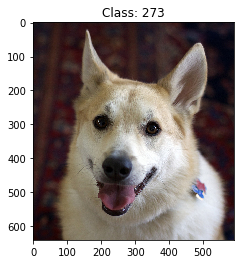

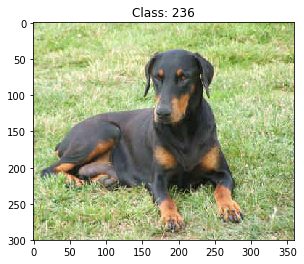

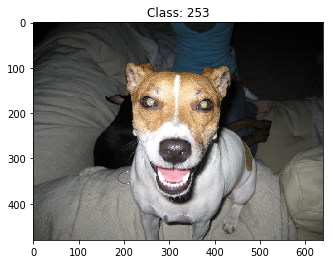

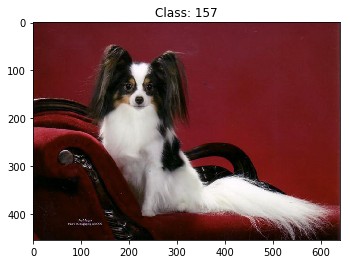

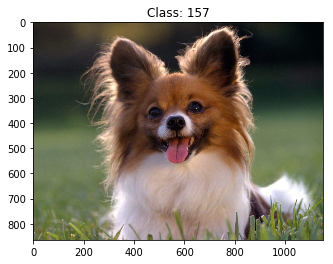

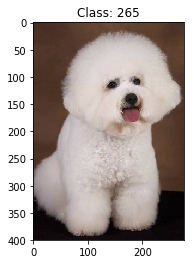

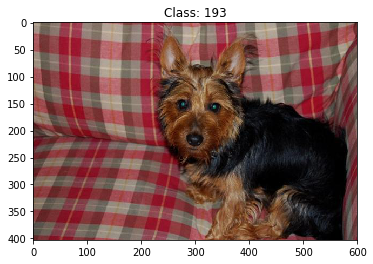

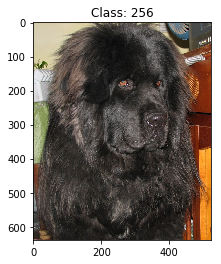

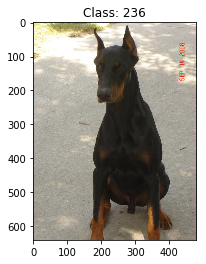

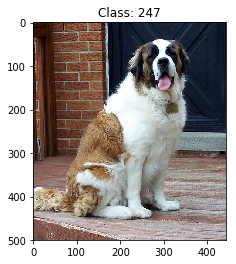

In [8]:
#Test VGG16 Performance
import random

VGG_inputsize = (224, 224)
VGG_cropsize = 224
indexes= [random.randint(1, 999) for iter in range(10)]

for index in indexes:
    prediction_test(index, dog_files, Model_predict, VGG16, VGG_inputsize, VGG_cropsize)

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [9]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path, prediction_function, model, inputsize, cropsize):
    ## TODO: Complete the function.
    category = prediction_function(img_path, model, inputsize, cropsize)
    return True if 150 < category < 269 else False # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__  
    The human_files_short contained 2% of images with dogs detected.  
    The dog_files_short contained 100% of images with dogs detected.


In [10]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

human_result = []
dog_result = []
for index in tqdm(range(100)):
    human_result.append(dog_detector((human_files_short[index]), Model_predict, VGG16, VGG_inputsize, VGG_cropsize))
    dog_result.append(dog_detector((dog_files_short[index]), Model_predict, VGG16, VGG_inputsize, VGG_cropsize))

print(f'Dogs detected in dog files: {dog_result.count(True)}%')
print(f'Dogs detected in human files: {human_result.count(True)}%')



100%|██████████| 100/100 [00:07<00:00, 14.24it/s]

Dogs detected in dog files: 100%
Dogs detected in human files: 0%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [11]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.
import torch
import torchvision.models as models

INC_V3 = models.inception_v3(pretrained=True)

use_cuda = torch.cuda.is_available()

if use_cuda:
    INC_V3 = INC_V3.cuda()

#switch model to evaluation mode
INC_V3.eval()

#add new model to dictionary for function calls
model_dict.update({'INC_V3': INC_V3})

Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.torch/models/inception_v3_google-1a9a5a14.pth
100%|██████████| 108857766/108857766 [00:01<00:00, 58539475.76it/s]


In [12]:
#Test Inception Model
import random

INC_inputsize = (299, 299)
INC_cropsize = 299
index = 160

Model_predict(dog_files[index], INC_V3, (299, 299), 299)

169

In [13]:
human_result = []
dog_result = []
for index in tqdm(range(100)):
    human_result.append(dog_detector((human_files_short[index]), Model_predict, INC_V3, INC_inputsize, INC_cropsize))
    dog_result.append(dog_detector((dog_files_short[index]), Model_predict, INC_V3, INC_inputsize, INC_cropsize))

print(f'Dogs detected in dog files: {dog_result.count(True)}%')
print(f'Dogs detected in human files: {human_result.count(True)}%')




100%|██████████| 100/100 [00:08<00:00, 12.26it/s]

Dogs detected in dog files: 100%
Dogs detected in human files: 1%


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [14]:
import os
from torchvision import datasets
import torchvision.transforms as transforms
from PIL import ImageFile

#added to handle corrupted image erro
ImageFile.LOAD_TRUNCATED_IMAGES = True

transform_training = transforms.Compose([
        transforms.Resize((224,224)),
        transforms.RandomHorizontalFlip(),
        transforms.ColorJitter(brightness=0.25, contrast=0.1, saturation=0.1, hue=0.1),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

transform_valid = transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
train_set = datasets.ImageFolder('/data/dog_images/train', transform=transform_training)
train_loader = torch.utils.data.DataLoader(train_set, shuffle=True, batch_size=16, num_workers=2)

valid_set = datasets.ImageFolder('/data/dog_images/valid', transform=transform_valid)
valid_loader = torch.utils.data.DataLoader(valid_set, shuffle=True, batch_size=16, num_workers=2)

test_set = datasets.ImageFolder('/data/dog_images/test', transform=transform_valid)
test_loader = torch.utils.data.DataLoader(test_set, shuffle=True, batch_size=16, num_workers=2)

loaders_scratch = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}

#print(train_loader)

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**: 
How does your code resize the images (by cropping, strecthing, etc)?

My code resizes the images to 224x224 using default bilinear interpolation no cropping or stretching was done as the images I inspected from the dataset appeared to be mostly centered without any horizontal or vertical stretching to account for in training.

What size did you pick for the input tensor, and why?

The size of the input tensor is (224, 224) to match the size of input that VGG_16 is expecting assuming this was an optimal size to use for comparison to the model architecture developed using transfer learning.

Did you decide to augment the dataset? If so, how (through translations, flips, rotations, etc)? If not, why not?

I augmented the dataset to account for the variantion in the direction the dogs where facing the images with a horizontal flip and to try to vary the brightness, contrast, saturation and hue of the images in the training set to help it identify color variations within similiar breeds.
        

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [15]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 6, 7, stride=1, padding=3)
        self.conv2 = nn.Conv2d(6, 12, 3, padding=1)
        self.conv3 = nn.Conv2d(12, 24, 3, padding=1)
        self.conv4 = nn.Conv2d(24, 48, 3, padding=1)
        self.conv5 = nn.Conv2d(48, 48, 3, padding=1)
    
        self.bn1 = nn.BatchNorm2d(6)
        self.bn2 = nn.BatchNorm2d(12)
        self.bn3 = nn.BatchNorm2d(24)
        self.bn4 = nn.BatchNorm2d(48)
        self.bn5 = nn.BatchNorm2d(48)
        
        #added
        self.dropout = nn.Dropout(0.4)
        
        self.pool = nn.MaxPool2d(2, 2)
        
        self.fc1 = nn.Linear(48 * 14 * 14, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 133)
        
    def forward(self, x):
        ## Define forward behavior
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        x = self.pool(F.relu(self.bn4(self.conv4(x))))
        x = F.relu(self.bn5(self.conv5(x)))
        x = x.view(-1, 14 * 14 * 48)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.fc3(x)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()
    
print(model_scratch)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
  (conv2): Conv2d(6, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(24, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn4): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn5): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.4)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=9408, out_features=1024, bia

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ The basic structure of the CNN is designed to go as deep as possible while keeping training times down.  To accomplish the balance between performance and train time I employed 3x3 kernels with dropping between each convolutional layer.  Batch normalization was employed to improve speed, performance and stablity of network while using ReLU activation function over a sigmoid because the former is more computationally efficient. 

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [16]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.002, momentum=0.9)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [17]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in (range(1, n_epochs+1)):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            
            optimizer.zero_grad()
            
            output = model(data)
            
            loss = criterion(output, target)
            
            loss.backward()
            
            optimizer.step()
            
            ## record the average training loss, using something like
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            #print(f'Train Loss: {train_loss}')
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss_min > valid_loss:
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model

In [37]:
# train the model
model_scratch = train(45, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')


# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 4.881470 	Validation Loss: 4.837854
Epoch: 2 	Training Loss: 4.740070 	Validation Loss: 4.568357
Epoch: 3 	Training Loss: 4.464308 	Validation Loss: 4.304052
Epoch: 4 	Training Loss: 4.270888 	Validation Loss: 4.240713
Epoch: 5 	Training Loss: 4.165838 	Validation Loss: 4.116978
Epoch: 6 	Training Loss: 4.065532 	Validation Loss: 4.041461
Epoch: 7 	Training Loss: 3.970119 	Validation Loss: 3.970211
Epoch: 8 	Training Loss: 3.872199 	Validation Loss: 3.879519
Epoch: 9 	Training Loss: 3.795617 	Validation Loss: 3.899803
Epoch: 10 	Training Loss: 3.700663 	Validation Loss: 3.792506
Epoch: 11 	Training Loss: 3.615162 	Validation Loss: 3.894549
Epoch: 12 	Training Loss: 3.532202 	Validation Loss: 3.664246
Epoch: 13 	Training Loss: 3.434906 	Validation Loss: 3.764084
Epoch: 14 	Training Loss: 3.325467 	Validation Loss: 3.654734
Epoch: 15 	Training Loss: 3.217401 	Validation Loss: 3.686398
Epoch: 16 	Training Loss: 3.082902 	Validation Loss: 3.687483
Epoch: 17 	Traini

In [18]:
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

In [ ]:
# train the model
model_scratch = train(30, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch2.pt')


# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch2.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [19]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

In [20]:
# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.435416


Test Accuracy: 19% (165/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [21]:
## TODO: Specify data loaders
import os
from torchvision import datasets

#added to handle corrupted image erro
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

transform = transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
train_set = datasets.ImageFolder('/data/dog_images/train', transform=transform)
train_transfer_loader = torch.utils.data.DataLoader(train_set, shuffle=True, batch_size=32, num_workers=1)

valid_set = datasets.ImageFolder('/data/dog_images/valid', transform=transform)
valid_transfer_loader = torch.utils.data.DataLoader(valid_set, shuffle=True, batch_size=32, num_workers=1)

test_set = datasets.ImageFolder('/data/dog_images/test', transform=transform)
test_transfer_loader = torch.utils.data.DataLoader(test_set, shuffle=True, batch_size=32, num_workers=1)

loaders_transfer = {'train': train_transfer_loader, 'valid': valid_transfer_loader, 'test': test_transfer_loader}
data_transfer={'train': train_set, 'valid': valid_set, 'test': test_set}


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [22]:
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim

## TODO: Specify model architecture 
model_transfer = models.vgg16(pretrained=True)

#freeze weights in convolutional layers
for param in model_transfer.features.parameters():
    param.requires_grad = False

#replace last layer of classifier    
model_transfer.classifier[6] = nn.Linear(4096, 133)
#Initialize weights of replaced classifier layer
nn.init.kaiming_normal_(model_transfer.classifier[6].weight, nonlinearity='relu')


if use_cuda:
    model_transfer = model_transfer.cuda()
    
print(model_transfer)



#Check output has correct number of features
print(model_transfer.classifier[6])



VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
I chose to implement my final CNN architecture based on the VGG16 model because it performs well on image classification tasks but is simple, straightforward architecture.  The main drawback to this model is it's size and the amount of time it takes to train. Due to having a relatively small training set I replaced only the final layer of the classifier in an attempt to balance training time with performance.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [23]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(model_transfer.classifier.parameters(), lr=0.0003)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [29]:
# train the model
model_transfer = train(10, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

Epoch: 1 	Training Loss: 2.445208 	Validation Loss: 1.024099
Epoch: 2 	Training Loss: 1.135265 	Validation Loss: 0.815609
Epoch: 3 	Training Loss: 0.772725 	Validation Loss: 0.986997
Epoch: 4 	Training Loss: 0.626227 	Validation Loss: 0.896215
Epoch: 5 	Training Loss: 0.532711 	Validation Loss: 0.994169
Epoch: 6 	Training Loss: 0.470910 	Validation Loss: 0.919650
Epoch: 7 	Training Loss: 0.451784 	Validation Loss: 1.108344
Epoch: 8 	Training Loss: 0.460613 	Validation Loss: 1.076026
Epoch: 9 	Training Loss: 0.465174 	Validation Loss: 1.226941
Epoch: 10 	Training Loss: 0.447023 	Validation Loss: 1.331607


In [24]:
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [25]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.853292


Test Accuracy: 73% (614/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [26]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    loader = transforms.Compose([
        transforms.Resize((224,224)),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    ## Return the *index* of the predicted class for that image
    img = Image.open(img_path)
    if use_cuda:
        img = loader(img).cuda()
    else:
        img = loader(img).float()
        
    img = img.unsqueeze(0)
    output = model_transfer(img)
    max_value, max_index = torch.max(output, 1)
    return class_names[int(max_index)]



---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [35]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path, prediction_function, model, inputsize, cropsize):
    ## handle cases for a human face, dog, and neither
    img = cv2.imread(img_path)
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure()
    if dog_detector(img_path, prediction_function, model, inputsize, cropsize):
        plt.title(f"This dog is a {predict_breed_transfer(img_path)}\n")
    elif face_detector(img_path):
        #cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        #plt.figure()
        plt.title(f"This human looks like a {predict_breed_transfer(img_path)}")
        #plt.imshow(cv_rgb)
    else:
        #print("What the heck is this?")
        plt.title(f"What the heck is this?")
    plt.imshow(cv_rgb)
        
        

    


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ 
The output of the algorithm is slightly worse than I intially expected but as I came to realize how difficult it is to tell the breeds apart based on all the possible variations not just in the subjects position but image properties such as saturation and hue I became more impressed with the result. 

To improve my algorithm I would like to experiment with using a learning rate scheduler. During my experimentation on both the scracth implementation and transfer model I noticed oscillations in the error rate which occured after a number of epochs that seemd to vary depending on the value of the constant learning rate.  I believe using a learning scheduler would allow the models to more quickly converging on a solution and preventing oscillations in error rates after a specific number of epoches.

Another improvement that could be made was to explore more advanced preprocessing of the images and remove the dog images that had human faces in them from the training set, which I stumbled across when exploring the data.  When looking at how the algorithm handled two images of the same human it produced different results which indicate that it was still sensitive to the subjects positionings and/or image properties.

Finally I would experiment with replacing more of the classifier layers in the transfer model with different weight intilizations that might help the model converge and prevent oscillations around the error minima.  More modern weight initializaton techniques are said to help with mitigating exploding or vanishing gradients which would also have been beneficial for training a deeper scratch network.

There are 3 total human images.
There are 3 total dog images.
There are 1 total other images


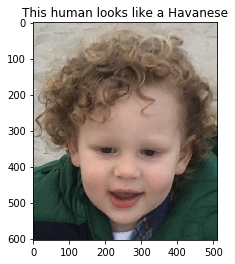

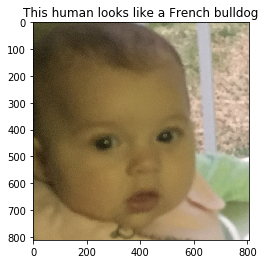

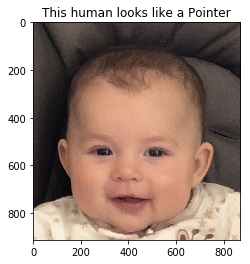

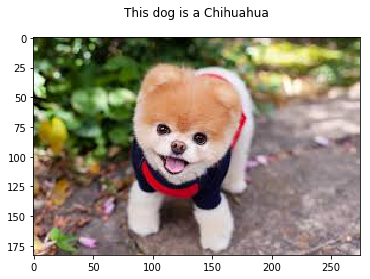

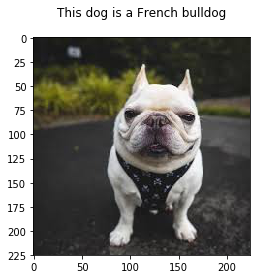

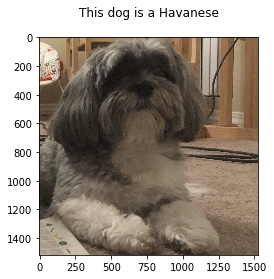

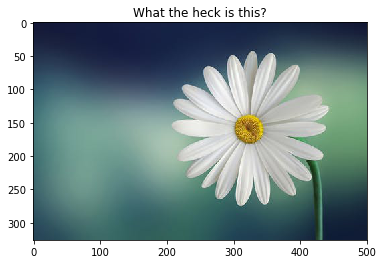

In [36]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

# load filenames for human and dog images
human_files = np.array(glob("/home/workspace/dog_project/test images/humans/*"))
dog_files = np.array(glob("/home/workspace/dog_project/test images/dogs/*"))
other_files = np.array(glob("/home/workspace/dog_project/test images/others/*"))
                     
# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))
print('There are %d total other images' % len(other_files))

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3], other_files[:1])):
    run_app(file, Model_predict, VGG16, (224, 224), 224 )